# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 802s 5us/step


## Load dataset, Preprocessing

In [4]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [5]:
output_dim = nb_classes = 10

In [7]:
input_dim = (32,32,3)
X_train = X_train.reshape(50000, *input_dim)
X_test = X_test.reshape(10000, *input_dim)

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
print(input_dim, X_train.shape, Y_train.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) 10


## Build Model

In [14]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 16)       

In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 398us/sample - loss: 2.2858 - accuracy: 0.1380 - val_loss: 2.2631 - val_accuracy: 0.1727
Epoch 2/100
50000/50000 [==============================] - 17s 348us/sample - loss: 2.2437 - accuracy: 0.1959 - val_loss: 2.2189 - val_accuracy: 0.2298
Epoch 3/100
50000/50000 [==============================] - 18s 351us/sample - loss: 2.1862 - accuracy: 0.2399 - val_loss: 2.1516 - val_accuracy: 0.2462
Epoch 4/100
50000/50000 [==============================] - 17s 345us/sample - loss: 2.1220 - accuracy: 0.2607 - val_loss: 2.0920 - val_accuracy: 0.2651
Epoch 5/100
50000/50000 [==============================] - 17s 347us/sample - loss: 2.0648 - accuracy: 0.2734 - val_loss: 2.0347 - val_accuracy: 0.2808
Epoch 6/100
50000/50000 [==============================] - 17s 346us/sample - loss: 2.0146 - accuracy: 0.2857 - val_loss: 1.9911 - val_accuracy: 0.2921
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 18s 354us/sample - loss: 1.3614 - accuracy: 0.4307 - val_loss: 1.4614 - val_accuracy: 0.4072
Epoch 55/100
50000/50000 [==============================] - 18s 359us/sample - loss: 1.3584 - accuracy: 0.4330 - val_loss: 1.5179 - val_accuracy: 0.3820
Epoch 56/100
50000/50000 [==============================] - 17s 349us/sample - loss: 1.3538 - accuracy: 0.4341 - val_loss: 1.4488 - val_accuracy: 0.4115
Epoch 57/100
50000/50000 [==============================] - 18s 356us/sample - loss: 1.3498 - accuracy: 0.4354 - val_loss: 1.4213 - val_accuracy: 0.4114
Epoch 58/100
50000/50000 [==============================] - 18s 351us/sample - loss: 1.3465 - accuracy: 0.4364 - val_loss: 1.4172 - val_accuracy: 0.4087
Epoch 59/100
50000/50000 [==============================] - 17s 350us/sample - loss: 1.3425 - accuracy: 0.4375 - val_loss: 1.4479 - val_accuracy: 0.4054
Epoch 60/100
50000/50000 [==============================] - 17s 348us/sample - loss: 1.3387 - a

In [19]:
import matplotlib.pyplot as plt

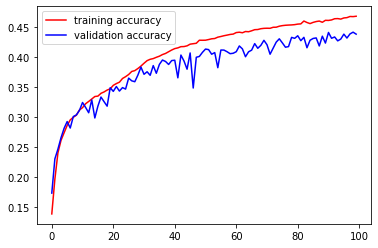

In [20]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

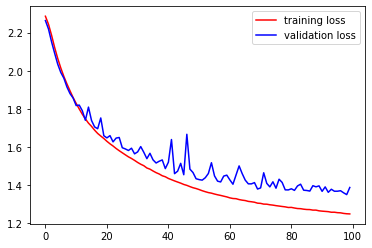

In [21]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

## Inference

In [22]:
predictions = model.predict_classes(X_test)

In [26]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import numpy as np

# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

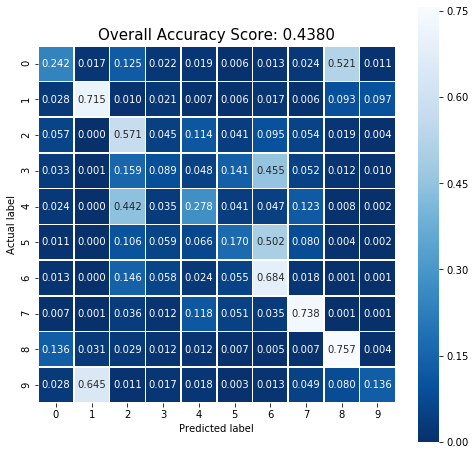

In [27]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();

## arch 2 300 epochs

In [28]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 16)       

In [30]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
batch_size=128
epochs=300
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 19s 373us/sample - loss: 2.2600 - accuracy: 0.1571 - val_loss: 2.2307 - val_accuracy: 0.1665
Epoch 2/300
50000/50000 [==============================] - 17s 346us/sample - loss: 2.1896 - accuracy: 0.1706 - val_loss: 2.1721 - val_accuracy: 0.1725
Epoch 3/300
50000/50000 [==============================] - 17s 346us/sample - loss: 2.1288 - accuracy: 0.1829 - val_loss: 2.1007 - val_accuracy: 0.2004
Epoch 4/300
50000/50000 [==============================] - 17s 346us/sample - loss: 2.0794 - accuracy: 0.1980 - val_loss: 2.0595 - val_accuracy: 0.2008
Epoch 5/300
50000/50000 [==============================] - 17s 346us/sample - loss: 2.0406 - accuracy: 0.2016 - val_loss: 2.0219 - val_accuracy: 0.2061
Epoch 6/300
50000/50000 [==============================] - 18s 367us/sample - loss: 2.0087 - accuracy: 0.2060 - val_loss: 1.9941 - val_accuracy: 0.2107
Epoch 7/300
50000/50000 [=============

50000/50000 [==============================] - 20s 404us/sample - loss: 1.6010 - accuracy: 0.3067 - val_loss: 1.6510 - val_accuracy: 0.2946
Epoch 55/300
50000/50000 [==============================] - 20s 393us/sample - loss: 1.5986 - accuracy: 0.3075 - val_loss: 1.6449 - val_accuracy: 0.2923
Epoch 56/300
50000/50000 [==============================] - 20s 401us/sample - loss: 1.5944 - accuracy: 0.3095 - val_loss: 1.6575 - val_accuracy: 0.2918
Epoch 57/300
50000/50000 [==============================] - 20s 399us/sample - loss: 1.5933 - accuracy: 0.3096 - val_loss: 1.6454 - val_accuracy: 0.2943
Epoch 58/300
50000/50000 [==============================] - 19s 382us/sample - loss: 1.5879 - accuracy: 0.3098 - val_loss: 1.6342 - val_accuracy: 0.2940
Epoch 59/300
50000/50000 [==============================] - 20s 399us/sample - loss: 1.5883 - accuracy: 0.3101 - val_loss: 1.6536 - val_accuracy: 0.2945
Epoch 60/300
50000/50000 [==============================] - 19s 389us/sample - loss: 1.5852 - a

50000/50000 [==============================] - 17s 345us/sample - loss: 1.5186 - accuracy: 0.3358 - val_loss: 1.5968 - val_accuracy: 0.3160
Epoch 108/300
50000/50000 [==============================] - 17s 345us/sample - loss: 1.5177 - accuracy: 0.3377 - val_loss: 1.6099 - val_accuracy: 0.3061
Epoch 109/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.5174 - accuracy: 0.3353 - val_loss: 1.6142 - val_accuracy: 0.3096
Epoch 110/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.5178 - accuracy: 0.3369 - val_loss: 1.5962 - val_accuracy: 0.3111
Epoch 111/300
50000/50000 [==============================] - 17s 343us/sample - loss: 1.5165 - accuracy: 0.3389 - val_loss: 1.5883 - val_accuracy: 0.3150
Epoch 112/300
50000/50000 [==============================] - 17s 341us/sample - loss: 1.5152 - accuracy: 0.3389 - val_loss: 1.5918 - val_accuracy: 0.3202
Epoch 113/300
50000/50000 [==============================] - 17s 343us/sample - loss: 1.51

50000/50000 [==============================] - 19s 370us/sample - loss: 1.4527 - accuracy: 0.3664 - val_loss: 1.5597 - val_accuracy: 0.3516
Epoch 161/300
50000/50000 [==============================] - 18s 364us/sample - loss: 1.4512 - accuracy: 0.3673 - val_loss: 1.5604 - val_accuracy: 0.3443
Epoch 162/300
50000/50000 [==============================] - 19s 373us/sample - loss: 1.4477 - accuracy: 0.3665 - val_loss: 1.5709 - val_accuracy: 0.3379
Epoch 163/300
50000/50000 [==============================] - 18s 370us/sample - loss: 1.4462 - accuracy: 0.3690 - val_loss: 1.5559 - val_accuracy: 0.3468
Epoch 164/300
50000/50000 [==============================] - 19s 370us/sample - loss: 1.4455 - accuracy: 0.3688 - val_loss: 1.5532 - val_accuracy: 0.3386
Epoch 165/300
50000/50000 [==============================] - 18s 365us/sample - loss: 1.4441 - accuracy: 0.3704 - val_loss: 1.5547 - val_accuracy: 0.3479
Epoch 166/300
50000/50000 [==============================] - 18s 364us/sample - loss: 1.44

50000/50000 [==============================] - 17s 347us/sample - loss: 1.3952 - accuracy: 0.3869 - val_loss: 1.5384 - val_accuracy: 0.3613
Epoch 214/300
50000/50000 [==============================] - 17s 347us/sample - loss: 1.3957 - accuracy: 0.3875 - val_loss: 1.5253 - val_accuracy: 0.3615
Epoch 215/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.3957 - accuracy: 0.3869 - val_loss: 1.5183 - val_accuracy: 0.3678
Epoch 216/300
50000/50000 [==============================] - 17s 346us/sample - loss: 1.3939 - accuracy: 0.3890 - val_loss: 1.5235 - val_accuracy: 0.3695
Epoch 217/300
50000/50000 [==============================] - 17s 349us/sample - loss: 1.3935 - accuracy: 0.3871 - val_loss: 1.5295 - val_accuracy: 0.3622
Epoch 218/300
50000/50000 [==============================] - 17s 346us/sample - loss: 1.3942 - accuracy: 0.3889 - val_loss: 1.5213 - val_accuracy: 0.3630
Epoch 219/300
50000/50000 [==============================] - 17s 346us/sample - loss: 1.39

50000/50000 [==============================] - 17s 344us/sample - loss: 1.3684 - accuracy: 0.4021 - val_loss: 1.5207 - val_accuracy: 0.3695
Epoch 267/300
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3686 - accuracy: 0.4020 - val_loss: 1.5371 - val_accuracy: 0.3735
Epoch 268/300
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3678 - accuracy: 0.4037 - val_loss: 1.5153 - val_accuracy: 0.3744
Epoch 269/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.3666 - accuracy: 0.4038 - val_loss: 1.5230 - val_accuracy: 0.3689
Epoch 270/300
50000/50000 [==============================] - 17s 345us/sample - loss: 1.3685 - accuracy: 0.4041 - val_loss: 1.5075 - val_accuracy: 0.3723
Epoch 271/300
50000/50000 [==============================] - 17s 344us/sample - loss: 1.3645 - accuracy: 0.4048 - val_loss: 1.5128 - val_accuracy: 0.3714
Epoch 272/300
50000/50000 [==============================] - 17s 346us/sample - loss: 1.36

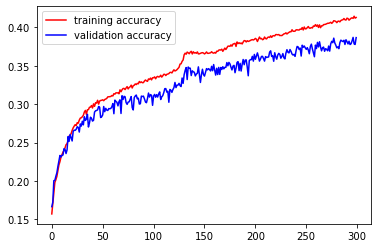

In [32]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

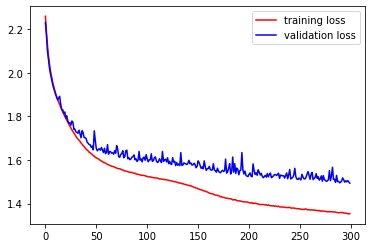

In [33]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [34]:
predictions_1 = model.predict_classes(X_test)

## arch 3 100 epochs add layer

In [35]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 16)       

In [37]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
batch_size=128
epochs=100
history_3 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 405us/sample - loss: 2.2843 - accuracy: 0.1169 - val_loss: 2.2525 - val_accuracy: 0.1601
Epoch 2/100
50000/50000 [==============================] - 18s 360us/sample - loss: 2.2162 - accuracy: 0.1783 - val_loss: 2.1924 - val_accuracy: 0.1793
Epoch 3/100
50000/50000 [==============================] - 18s 358us/sample - loss: 2.1490 - accuracy: 0.2051 - val_loss: 2.1299 - val_accuracy: 0.2252
Epoch 4/100
50000/50000 [==============================] - 18s 361us/sample - loss: 2.0946 - accuracy: 0.2268 - val_loss: 2.0750 - val_accuracy: 0.2460
Epoch 5/100
50000/50000 [==============================] - 18s 355us/sample - loss: 2.0492 - accuracy: 0.2439 - val_loss: 2.0577 - val_accuracy: 0.2273
Epoch 6/100
50000/50000 [==============================] - 18s 356us/sample - loss: 2.0100 - accuracy: 0.2501 - val_loss: 1.9915 - val_accuracy: 0.2509
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 18s 352us/sample - loss: 1.4536 - accuracy: 0.3859 - val_loss: 1.5370 - val_accuracy: 0.3657
Epoch 55/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.4498 - accuracy: 0.3861 - val_loss: 1.5438 - val_accuracy: 0.3656
Epoch 56/100
50000/50000 [==============================] - 18s 353us/sample - loss: 1.4445 - accuracy: 0.3883 - val_loss: 1.5214 - val_accuracy: 0.3755
Epoch 57/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.4409 - accuracy: 0.3894 - val_loss: 1.5144 - val_accuracy: 0.3768
Epoch 58/100
50000/50000 [==============================] - 18s 364us/sample - loss: 1.4381 - accuracy: 0.3917 - val_loss: 1.5060 - val_accuracy: 0.3731
Epoch 59/100
50000/50000 [==============================] - 18s 355us/sample - loss: 1.4315 - accuracy: 0.3919 - val_loss: 1.5384 - val_accuracy: 0.3614
Epoch 60/100
50000/50000 [==============================] - 18s 354us/sample - loss: 1.4281 - a

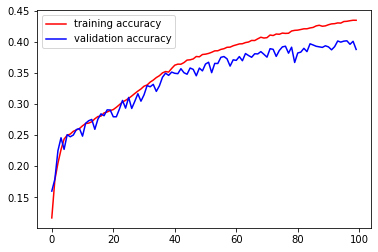

In [39]:
plt.plot(history_3.history['accuracy'],'r')
plt.plot(history_3.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

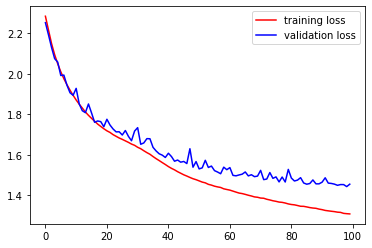

In [40]:
plt.plot(history_3.history['loss'],'r')
plt.plot(history_3.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [41]:
predictions_3 = model.predict_classes(X_test)

## arch 4 change base model

In [42]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 16)       

In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
batch_size=128
epochs=100
history_3 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 378us/sample - loss: 1.9197 - accuracy: 0.3043 - val_loss: 1.6747 - val_accuracy: 0.4021
Epoch 2/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.5220 - accuracy: 0.4529 - val_loss: 1.5336 - val_accuracy: 0.4463
Epoch 3/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.4061 - accuracy: 0.4974 - val_loss: 1.4946 - val_accuracy: 0.4629
Epoch 4/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3418 - accuracy: 0.5232 - val_loss: 1.3423 - val_accuracy: 0.5206
Epoch 5/100
50000/50000 [==============================] - 17s 346us/sample - loss: 1.2990 - accuracy: 0.5405 - val_loss: 1.4571 - val_accuracy: 0.4978
Epoch 6/100
50000/50000 [==============================] - 17s 339us/sample - loss: 1.2652 - accuracy: 0.5515 - val_loss: 1.4092 - val_accuracy: 0.5031
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 17s 338us/sample - loss: 0.8541 - accuracy: 0.6997 - val_loss: 0.9716 - val_accuracy: 0.6655
Epoch 55/100
50000/50000 [==============================] - 17s 341us/sample - loss: 0.8506 - accuracy: 0.7012 - val_loss: 0.9851 - val_accuracy: 0.6578
Epoch 56/100
50000/50000 [==============================] - 17s 342us/sample - loss: 0.8489 - accuracy: 0.7023 - val_loss: 0.9895 - val_accuracy: 0.6552
Epoch 57/100
50000/50000 [==============================] - 17s 342us/sample - loss: 0.8457 - accuracy: 0.7016 - val_loss: 0.9634 - val_accuracy: 0.6662
Epoch 58/100
50000/50000 [==============================] - 17s 341us/sample - loss: 0.8435 - accuracy: 0.7038 - val_loss: 1.0026 - val_accuracy: 0.6508
Epoch 59/100
50000/50000 [==============================] - 17s 342us/sample - loss: 0.8422 - accuracy: 0.7027 - val_loss: 0.9472 - val_accuracy: 0.6695
Epoch 60/100
50000/50000 [==============================] - 17s 339us/sample - loss: 0.8413 - a

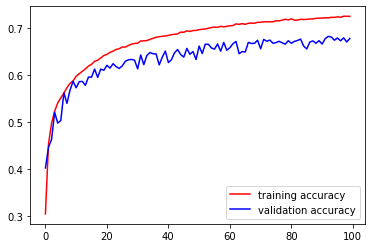

In [46]:
plt.plot(history_3.history['accuracy'],'r')
plt.plot(history_3.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

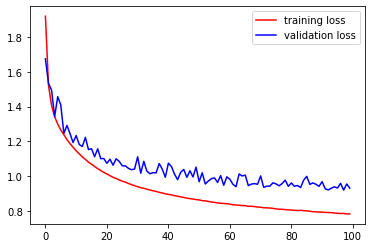

In [47]:
plt.plot(history_3.history['loss'],'r')
plt.plot(history_3.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_3 = model.predict_classes(X_test)

## arch 5 change base model (2)

In [49]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
# model.add(Activation('softmax'))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 16)       

In [51]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
batch_size=128
epochs=30
history_4 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 19s 381us/sample - loss: 1.9281 - accuracy: 0.2841 - val_loss: 1.6953 - val_accuracy: 0.3677
Epoch 2/30
50000/50000 [==============================] - 18s 361us/sample - loss: 1.5609 - accuracy: 0.4234 - val_loss: 1.8477 - val_accuracy: 0.3564
Epoch 3/30
50000/50000 [==============================] - 17s 349us/sample - loss: 1.4395 - accuracy: 0.4738 - val_loss: 1.4295 - val_accuracy: 0.4812
Epoch 4/30
50000/50000 [==============================] - 17s 347us/sample - loss: 1.3665 - accuracy: 0.5031 - val_loss: 1.3554 - val_accuracy: 0.5087
Epoch 5/30
50000/50000 [==============================] - 18s 354us/sample - loss: 1.3116 - accuracy: 0.5242 - val_loss: 1.3513 - val_accuracy: 0.5123
Epoch 6/30
50000/50000 [==============================] - 17s 347us/sample - loss: 1.2719 - accuracy: 0.5417 - val_loss: 1.2911 - val_accuracy: 0.5293
Epoch 7/30
50000/50000 [====================

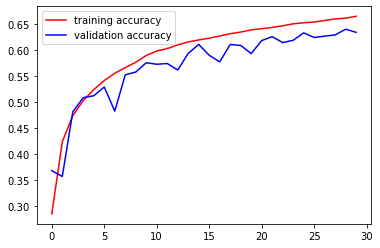

In [53]:
plt.plot(history_4.history['accuracy'],'r')
plt.plot(history_4.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

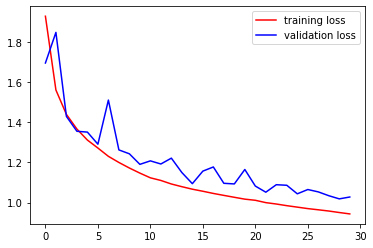

In [54]:
plt.plot(history_4.history['loss'],'r')
plt.plot(history_4.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_4 = model.predict_classes(X_test)

## arch 4-1 change base model (3)

In [59]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_25 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 12, 12, 32)       

In [61]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
batch_size=128
epochs=30
history_5 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 20s 398us/sample - loss: 1.8422 - accuracy: 0.3275 - val_loss: 1.6256 - val_accuracy: 0.4109
Epoch 2/30
50000/50000 [==============================] - 18s 364us/sample - loss: 1.5131 - accuracy: 0.4515 - val_loss: 1.5498 - val_accuracy: 0.4452
Epoch 3/30
50000/50000 [==============================] - 18s 365us/sample - loss: 1.4083 - accuracy: 0.4900 - val_loss: 1.4459 - val_accuracy: 0.4863
Epoch 4/30
50000/50000 [==============================] - 18s 368us/sample - loss: 1.3439 - accuracy: 0.5165 - val_loss: 1.4155 - val_accuracy: 0.4988
Epoch 5/30
50000/50000 [==============================] - 19s 386us/sample - loss: 1.2942 - accuracy: 0.5366 - val_loss: 1.4003 - val_accuracy: 0.4991
Epoch 6/30
50000/50000 [==============================] - 19s 380us/sample - loss: 1.2489 - accuracy: 0.5517 - val_loss: 1.5402 - val_accuracy: 0.4698
Epoch 7/30
50000/50000 [====================

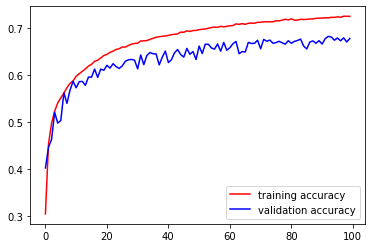

In [46]:
plt.plot(history_5.history['accuracy'],'r')
plt.plot(history_5.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

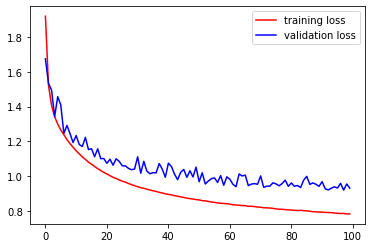

In [47]:
plt.plot(history_5.history['loss'],'r')
plt.plot(history_5.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_5 = model.predict_classes(X_test)